In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 30s 38ms/step - loss: 0.5802 - accuracy: 0.7862 - val_loss: 0.4177 - val_accuracy: 0.8457
Epoch 2/5
750/750 [==============================] - 27s 35ms/step - loss: 0.3692 - accuracy: 0.8651 - val_loss: 0.3448 - val_accuracy: 0.8753
Epoch 3/5
750/750 [==============================] - 26s 35ms/step - loss: 0.3115 - accuracy: 0.8871 - val_loss: 0.3066 - val_accuracy: 0.8910
Epoch 4/5
750/750 [==============================] - 29s 39ms/step - loss: 0.2804 - accuracy: 0.8980 - val_loss: 0.2860 - val_accuracy: 0.8932
Epoch 5/5
750/750 [==============================] - 26s 35ms/step - loss: 0.2532 - accuracy: 0.9072 - val_loss: 0.2809 - val_accuracy: 0.8967


In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.2846 - accuracy: 0.8970
Test accuracy: 0.8970000147819519


1/1 [==============================] - 0s 116ms/step


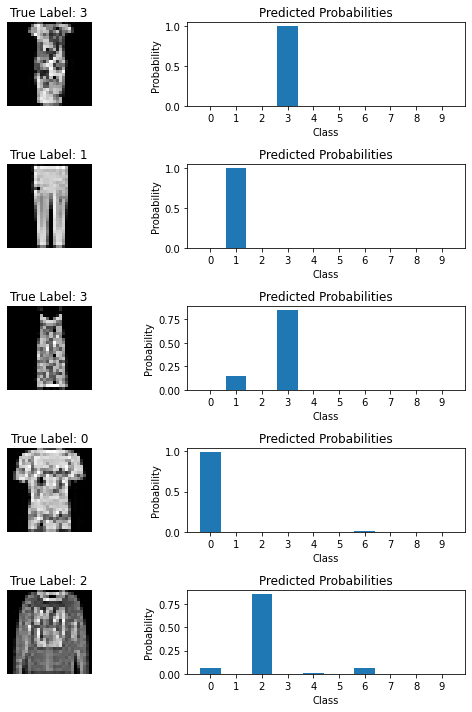

In [8]:
# Wybierz indeksy obrazów, na których chcesz przeprowadzić predykcję
selected_indexes = [100, 200, 300, 400, 500]

# Przeprowadź predykcję na wybranych obrazach
selected_images = test_images[selected_indexes]
selected_labels = test_labels[selected_indexes]
predictions = model.predict(selected_images)

# Wyświetl wyniki w formie wykresu
num_rows = len(selected_indexes)
num_cols = 2

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_rows):
    plt.subplot(num_rows, num_cols, 2*i+1)
    plt.imshow(selected_images[i].reshape(28, 28), cmap='gray')
    plt.title("True Label: {}".format(np.argmax(selected_labels[i])))
    plt.axis('off')
    
    plt.subplot(num_rows, num_cols, 2*i+2)
    plt.bar(np.arange(10), predictions[i])
    plt.title("Predicted Probabilities")
    plt.xlabel("Class")
    plt.ylabel("Probability")
    plt.xticks(np.arange(10))
    
plt.tight_layout()
plt.show()

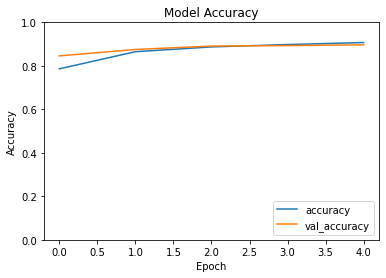

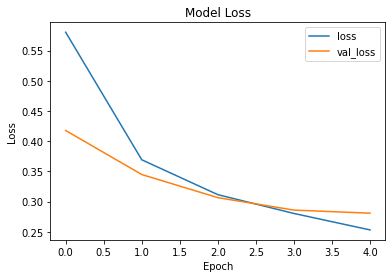

In [9]:
# Wykres dokładności
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Model Accuracy')
plt.show()

# Wykres straty
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Model Loss')
plt.show()